In [0]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from typing import Dict, Tuple
from scipy import stats
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV,learning_curve,validation_curve
import time
%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/NastjaK666/uni/master/StudentsPerformance.csv'
data = pd.read_csv(url)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
# Разделим датасет на обучающий (train) и тестовый (test) набор
trainX, testX, trainY, testY = train_test_split(data[['test preparation course','math score','reading score','writing score']],data['parental level of education'], test_size=0.3, random_state = 1)
print('Число строк обучающего и тестового наборов:')
print('  Обучающий: {0} ({1} %)'.format(trainX.shape[0], round(trainX.shape[0]/data.shape[0]*100,4))) #result procent 4 after point
print('  Тестовый: {0} ({1} %)'.format(testX.shape[0], round(testX.shape[0]/data.shape[0]*100,4)))

Число строк обучающего и тестового наборов:
  Обучающий: 700 (70.0 %)
  Тестовый: 300 (30.0 %)


In [0]:
ClassCoded = data[['parental level of education']]  #needs to be float data type
LaEnc = LabelEncoder()
data[['parental level of education']] = pd.DataFrame(LaEnc.fit_transform(ClassCoded), columns=[['parental level of education']])
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,1,72,72,74
1,female,group C,4,standard,0,69,90,88
2,female,group B,3,standard,1,90,95,93
3,male,group A,0,free/reduced,1,47,57,44
4,male,group C,4,standard,1,76,78,75


In [0]:
ClassCoded = data[['test preparation course']]  
LaEnc = LabelEncoder()
data[['test preparation course']] = pd.DataFrame(LaEnc.fit_transform(ClassCoded), columns=[['test preparation course']])
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,1,72,72,74
1,female,group C,4,standard,0,69,90,88
2,female,group B,3,standard,1,90,95,93
3,male,group A,0,free/reduced,1,47,57,44
4,male,group C,4,standard,1,76,78,75


In [0]:
# Проведём обучение модели числом соседей = 6
Classifier6N = KNeighborsClassifier(n_neighbors = 6)
Classifier6N.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
# Оценка качества обучения модели.
Nb6Score = round(Classifier6N.score(testX,testY)*100, 4) 
print('Классификатор с 6 соседями: {} %'.format(Nb6Score))

Классификатор с 6 соседями: 25.3333 %


In [0]:
Results6N = Classifier6N.predict(testX) #??
accuracy_score(testY, Results6N)

0.25333333333333335

In [0]:
# Рассмотрим результаты для каждого класса отдельно
resultDF = {
        'Prediction': Results6N,
        'Answer': testY
}
ResultData = pd.DataFrame(resultDF, columns = ['Prediction','Answer'])
Classes = np.unique(testY)
for c in Classes:
    temp_data_flt = ResultData[ResultData['Answer']==c]
    temp_acc = accuracy_score(
        temp_data_flt['Answer'].values, 
        temp_data_flt['Prediction'].values)
    print('Результат для класса {0}: {1} %'.format(c, round(temp_acc*100, 4)))

Результат для класса 0: 46.5517 %
Результат для класса 1: 15.5556 %
Результат для класса 2: 23.8095 %
Результат для класса 3: 12.5 %
Результат для класса 4: 29.6875 %
Результат для класса 5: 11.1111 %


In [0]:
ClassReport6N = classification_report(testY, Results6N, output_dict = True)
for ReportName,ReportResult in ClassReport6N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))     
# precision - true/identified as true
# recall - true/all present true
# f1-score = 2*p*r/(p+r)
# support = svm - support vector machine
# accuracy = 1true+2true/all identified as true1+true2


Class : 0
   precision : 	0.28125
   recall : 	0.46551724137931033
   f1-score : 	0.35064935064935066
   support : 	58

Class : 1
   precision : 	0.3181818181818182
   recall : 	0.15555555555555556
   f1-score : 	0.208955223880597
   support : 	45

Class : 2
   precision : 	0.21739130434782608
   recall : 	0.23809523809523808
   f1-score : 	0.22727272727272724
   support : 	63

Class : 3
   precision : 	0.125
   recall : 	0.125
   f1-score : 	0.125
   support : 	16

Class : 4
   precision : 	0.2835820895522388
   recall : 	0.296875
   f1-score : 	0.29007633587786263
   support : 	64

Class : 5
   precision : 	0.2
   recall : 	0.1111111111111111
   f1-score : 	0.14285714285714285
   support : 	54

Class : accuracy


AttributeError: ignored

In [0]:
# Кросс-валидация
# Стратифицированная K-Fold перекрёстная проверка
# тестирование на разных частях базы
data[['test preparation course','math score','reading score','writing score']],data['parental level of education']

Scores1 = cross_val_score(Classifier6N,data[['test preparation course','math score','reading score','writing score']],data['parental level of education'], cv = 3) # 3 parts
print('Результаты нестратифицированной перекрёстной проверки:')
for Sc in Scores1:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат нестратифицированной перекрёстной проверки: {} %\n'.format(round(Scores1.mean()*100,4)))
# Результат не точен из-за распределения классов в датасете
# Для решения данной проблеммы применим стратифицированную перекрёстную проверку
kfold = KFold(n_splits = 3, shuffle = True, random_state=0)
KFoldStartTime = time.time()
Scores2 = cross_val_score(Classifier6N,data[['test preparation course','math score','reading score','writing score']],data['parental level of education'], cv = kfold)
KFoldStopTime = time.time()
print('Результаты стратифицированной перекрёстной проверки:')
for Sc in Scores2:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат стратифицированной перекрёстной проверки: {} %'.format(round(Scores2.mean()*100,4)))

Результаты нестратифицированной перекрёстной проверки:
    21.131 %
    22.8228 %
    25.3776 %
Средний результат нестратифицированной перекрёстной проверки: 23.1105 %

Результаты стратифицированной перекрёстной проверки:
    21.5569 %
    20.7207 %
    21.3213 %
Средний результат стратифицированной перекрёстной проверки: 21.1996 %


In [0]:
# Перекрёстная проверка с исключением по одному количество фолдов = кол-во элементов
loo = LeaveOneOut()
LOOStartTime = time.time()
Scores3 = cross_val_score(Classifier6N,data[['test preparation course','math score','reading score','writing score']],data['parental level of education'], cv = loo)
LOOStopTime = time.time()
print('Средний результат перекрёстной проверки  с исключением по одному: {} %'.format(round(Scores3.mean()*100,4)))
print('Время выполнения стратифицированной перекрёстной проверки:{} с'.format(round(KFoldStopTime-KFoldStartTime,4)))
print('Время выполнения перекрёстной проверки с исключением по одному:{} с'.format(round(LOOStopTime-LOOStartTime,4)))

Средний результат перекрёстной проверки  с исключением по одному: 21.4 %
Время выполнения стратифицированной перекрёстной проверки:0.04 с
Время выполнения перекрёстной проверки с исключением по одному:3.6816 с


In [0]:
# Оптимизаия гиперпараметров hyperparameter - outside criteria not related to dataset
NeighborsArr = np.array(range(1,16))
tuned_parameters = [{'n_neighbors':NeighborsArr}]
ClassifierGS = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=loo, scoring='accuracy')
ClassifierGS.fit(data[['test preparation course','math score','reading score','writing score']],data['parental level of education'])

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
GSBP = ClassifierGS.best_params_.get('n_neighbors') #лучшее значение параметров
GSBP

3

In [0]:
#AttributeError: 'float' object has no attribute 'items'
ClassifierGSBP = KNeighborsClassifier(n_neighbors = GSBP)
ClassifierGSBP.fit(trainX,trainY)
ResultsGSBP = ClassifierGSBP.predict(testX)
ClassReport6N = classification_report(testY, ResultsGSBP, output_dict = True)
for ReportName,ReportResult in ClassReport6N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))


Class : 0
   precision : 	0.21428571428571427
   recall : 	0.5172413793103449
   f1-score : 	0.30303030303030304
   support : 	58

Class : 1
   precision : 	0.20833333333333334
   recall : 	0.2222222222222222
   f1-score : 	0.2150537634408602
   support : 	45

Class : 2
   precision : 	0.22448979591836735
   recall : 	0.1746031746031746
   f1-score : 	0.19642857142857142
   support : 	63

Class : 3
   precision : 	0.0
   recall : 	0.0
   f1-score : 	0.0
   support : 	16

Class : 4
   precision : 	0.1891891891891892
   recall : 	0.109375
   f1-score : 	0.1386138613861386
   support : 	64

Class : 5
   precision : 	0.05263157894736842
   recall : 	0.018518518518518517
   f1-score : 	0.0273972602739726
   support : 	54

Class : accuracy


AttributeError: ignored

In [0]:
# Кривые обучения и валидации
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

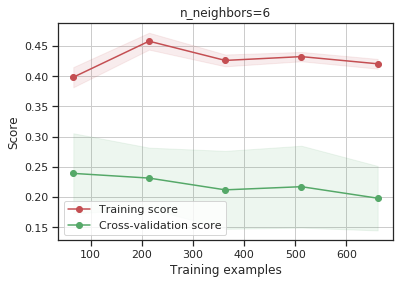

In [0]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), 'n_neighbors={}'.format(6), 
                    trainX, trainY, cv=20)

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

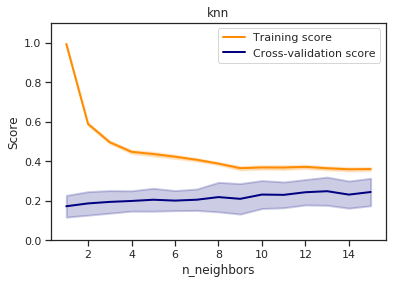

In [0]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      trainX, trainY, 
                      param_name='n_neighbors', param_range=NeighborsArr, 
                      cv=20, scoring="accuracy")